# Algorithms 1

Holly Christenson

4/19/2016

In [129]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## I. Converting Kelvin to Fahrenheit (and vice versa)

In [130]:
def K2F_test(temp,reverse=True):
    '''
    This is a function to convert an input temperature from Celsius to Fahrenheit, or vice versa
    
    Parameters
    -----------
    temp: float
        Input temperature in Kelvin
    reverse: boolean
        If False, the conversion will be from Kelvin to Fahrenheit
        If True, the conversion will be from Fahrenheit to Kelvin
          
    Returns
    ----------
    output: float
        Output temperature in Fahrenheit
    '''
    
    if reverse == False:
        output = (temp - 273)*(9/5) + 32
        if temp < 0:
            print("You have input a temperature below absolute zero!")
    if reverse == True:
        output = (5/9)*(temp-32) + 273
        if output < 0:
            print("You have calculated a temperature below absolute zero!")
        
    return output

In [131]:
#how to use the function...
x = K2F_test(-1000,False)
print(x)

You have input a temperature below absolute zero!
-2259.4


In [132]:
#import the function from file
import christenson_func as func

In [133]:
y = func.K2F(407,False)
print(y)

273.20000000000005


## II. Constellation Algorithm

Here's the goal:

**Which constellation is a given point in?**

This is the detailed constellation boundary lines data:
http://vizier.cfa.harvard.edu/viz-bin/Cat?cat=VI%2F49

You could use this data and do the full "Ray Casting" approach, or even cheat using matpltlib functions!
http://stackoverflow.com/a/23453678


A simplified approach from [Roman 1987](http://cdsads.u-strasbg.fr/abs/1987PASP...99..695R):
http://vizier.cfa.harvard.edu/viz-bin/Cat?VI/42#sRM2.1

In [174]:
# This is a sloppy way to read in the floats for the coordinates, and then the strings for the constellation names.
RAl, RAu, Decl, = np.loadtxt('data/data.txt', delimiter=',', usecols=(0,1,2), unpack=True)
names = np.loadtxt('data/data.txt', delimiter=',', usecols=(3,), unpack=True, dtype='str')

In [186]:
def constellation(ra,dec):
    '''
    This is a function to determine the constellation in which an object is located from its ra and dec
    
    Parameters
    -------
    ra: float
        Right ascension
    dec: float
        Declination
        
    Returns
    -------
    output: string
        Name of the constellation in which the object is located
    '''
    
    count = 0

    while(Decl[count] > dec):
        count = count + 1
    dec_low = Decl[count]
    print(dec_low)
    
    while(RAu[count] <= ra):
        count = count + 1
    ra_up = RAu[count]

    while(RAl[count] > ra or RAu[count] < ra):
        count = count + 1 
    ra_low = RAl[count]
    print(ra_low)
    
    plt.figure()
    plt.scatter(ra,dec,c='b',label='Star Location')
    plt.scatter(ra_low,dec_low,c='k',label="Constellation Bounds")
    plt.scatter(ra_up,dec_low,c='k')
    plt.legend(loc='best')
    plt.xlabel("Right Ascension",fontsize=14)
    plt.ylabel("Declination",fontsize=14)
    plt.show()
       
    output = names[count]
    
    print(count)
    
    return output
    

36.75
18.175


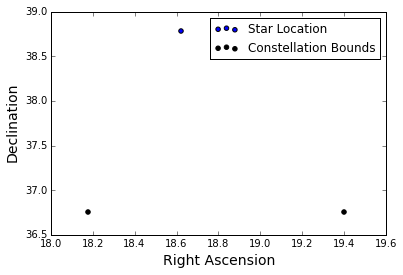

105


"b'LYR'"

In [187]:
#How to use the function: what constellation does Vega lie in?
constellation(18.62,38.78)

-82.5
13.6667


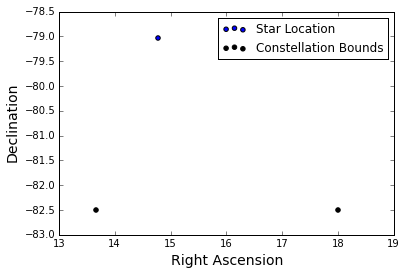

354


"b'APS'"

In [188]:
#What constellation does HD129078 lie in?
constellation(14.78,-79.03)